In [120]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [97]:
train_df=pd.read_csv(os.path.join('data','train.csv'))


In [98]:
train_df.shape

(1460, 81)

In [99]:
train_df.head
#sns.distplot(train_df["LotShape"])

for columns in train_df.columns:
    print(columns)

Id
MSSubClass
MSZoning
LotFrontage
LotArea
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
OverallQual
OverallCond
YearBuilt
YearRemodAdd
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
MasVnrArea
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinSF1
BsmtFinType2
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
Heating
HeatingQC
CentralAir
Electrical
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
KitchenQual
TotRmsAbvGrd
Functional
Fireplaces
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageCars
GarageArea
GarageQual
GarageCond
PavedDrive
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
PoolQC
Fence
MiscFeature
MiscVal
MoSold
YrSold
SaleType
SaleCondition
SalePrice


In [100]:
train_df.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [101]:
object_columns=pd.DataFrame((train_df.dtypes=='O'))

In [102]:
object_columns=pd.Series(object_columns.loc[:,0])

In [103]:
object_columns.value_counts()

True     43
False    38
Name: 0, dtype: int64

In [104]:
condition_factors=["OverallQual", #quality of finish
                   "OverallCond", #condition of house
                  "YearBuilt",
                  ] 

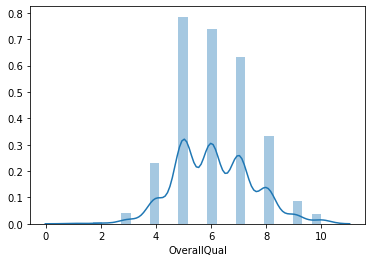

In [105]:
fig,ax=plt.subplots()
sns.distplot(train_df["OverallQual"])
plt.show()

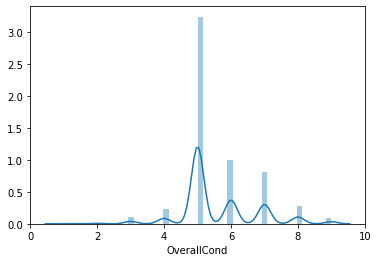

In [106]:
fig,ax=plt.subplots()
sns.distplot(train_df["OverallCond"])
plt.show()

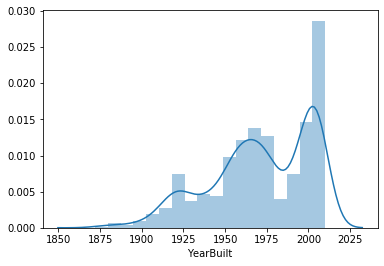

In [107]:
fig,ax=plt.subplots()
sns.distplot(train_df["YearBuilt"])
plt.show()

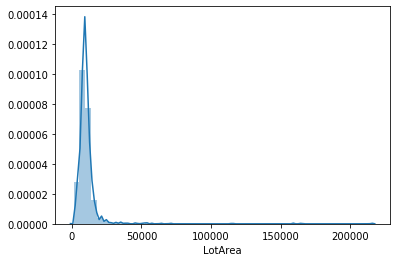

In [133]:
fig,ax=plt.subplots()
sns.distplot(train_df["LotArea"])
plt.show()

In [109]:
train_df["Utilities"].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [110]:
utilities=train_df["Utilities"].value_counts()

#utilities.plot(kind="density")

In [113]:
corr = train_df.corr()


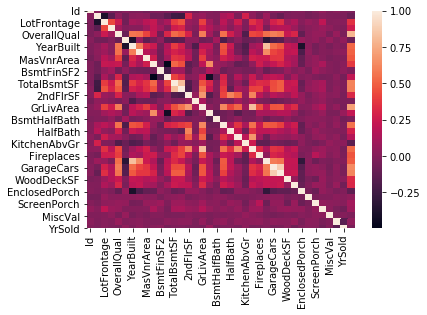

In [132]:
fig,ax=plt.subplots()
sns.heatmap(corr)
plt.show()

In [115]:
correlations_threshold=0.5
highly_correlated_values=[]
for column in corr.columns:
    for row in corr.index:
        correlation=corr.loc[row,column]
        if abs(correlation)>correlations_threshold:
            if row!=column:
                highly_correlated_values.append(row+" "+column)

In [116]:
highly_correlated_values

['YearBuilt OverallQual',
 'YearRemodAdd OverallQual',
 'TotalBsmtSF OverallQual',
 'GrLivArea OverallQual',
 'FullBath OverallQual',
 'GarageYrBlt OverallQual',
 'GarageCars OverallQual',
 'GarageArea OverallQual',
 'SalePrice OverallQual',
 'OverallQual YearBuilt',
 'YearRemodAdd YearBuilt',
 'GarageYrBlt YearBuilt',
 'GarageCars YearBuilt',
 'SalePrice YearBuilt',
 'OverallQual YearRemodAdd',
 'YearBuilt YearRemodAdd',
 'GarageYrBlt YearRemodAdd',
 'SalePrice YearRemodAdd',
 'TotalBsmtSF BsmtFinSF1',
 'BsmtFullBath BsmtFinSF1',
 'OverallQual TotalBsmtSF',
 'BsmtFinSF1 TotalBsmtSF',
 '1stFlrSF TotalBsmtSF',
 'SalePrice TotalBsmtSF',
 'TotalBsmtSF 1stFlrSF',
 'GrLivArea 1stFlrSF',
 'SalePrice 1stFlrSF',
 'GrLivArea 2ndFlrSF',
 'HalfBath 2ndFlrSF',
 'BedroomAbvGr 2ndFlrSF',
 'TotRmsAbvGrd 2ndFlrSF',
 'OverallQual GrLivArea',
 '1stFlrSF GrLivArea',
 '2ndFlrSF GrLivArea',
 'FullBath GrLivArea',
 'BedroomAbvGr GrLivArea',
 'TotRmsAbvGrd GrLivArea',
 'SalePrice GrLivArea',
 'BsmtFinSF1 Bsm

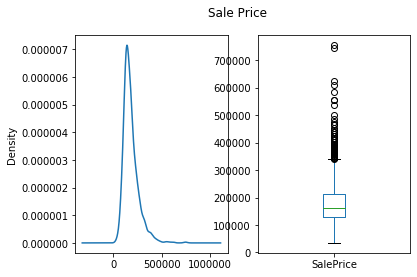

In [127]:
fig,(ax1,ax2)=plt.subplots(1,2)

fig.suptitle('Sale Price')
train_df["SalePrice"].plot(ax=ax1,kind="density")
train_df["SalePrice"].plot(ax=ax2,kind="box")
plt.show()


In [137]:
'''
MSSubClass={20:"1-STORY 1946 & NEWER ALL STYLES",
        30:"1-STORY 1945 & OLDER",
        40:"1-STORY W/FINISHED ATTIC ALL AGES",
        45:"1-1/2 STORY - UNFINISHED ALL AGES",
        50:"1-1/2 STORY FINISHED ALL AGES",
        60:"2-STORY 1946 & NEWER",
        70:"2-STORY 1945 & OLDER",
        75:"2-1/2 STORY ALL AGES",
        80:"SPLIT OR MULTI-LEVEL",
        85:"SPLIT FOYER",
        90:"DUPLEX - ALL STYLES AND AGES",
       120:"1-STORY PUD (Planned Unit Development) - 1946 & ",}
###
#def substitute_codes_for_named_value(column,dictionary)
MSSubClass[20]
'''



#train_df["MSSubClass"].value_counts()

'1-STORY 1946 & NEWER ALL STYLES'

In [140]:
MSSubClass_group=train_df.groupby(["MSSubClass"]).mean()

In [141]:
MSSubClass_group["SalePrice"]

MSSubClass
20     185224.811567
30      95829.724638
40     156125.000000
45     108591.666667
50     143302.972222
60     239948.501672
70     166772.416667
75     192437.500000
80     169736.551724
85     147810.000000
90     133541.076923
120    200779.080460
160    138647.380952
180    102300.000000
190    129613.333333
Name: SalePrice, dtype: float64